## Recreating figure 3.7 from Bishop's "Pattern Recognition and Machine Learning."

This notebook provides scaffolding for your exploration Bayesian Linear Gaussian Regression, as described in Lecture.
In particular, through this notebook you will reproduce several variants of figure 3.7 from Bishop's book.

## Instructions:

### 5.1-3:

Implement the functions in `problem` -- completed implementations of these functions are needed to generate the plots.

In [1]:
from support_code import *
from problem import *

## Instructions (continued):

### 5.4:

If your implementations are correct, then the next few code blocks in this notebook will generate the required variants of Bishop's figure. These are the same figures that you would obtain if you ran `python problem.py` from the command line -- this notebook is just provided as additional support.

In [2]:
# Generate our simulated dataset
# Note we are using sigma == 0.2

np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
data_size = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = generate_data(data_size,
                               noise,
                               actual_weights)

Next, we generate the plots using 3 different prior covariance matrix. In the main call to `problem.py`, this is done in a loop -- here we wrap the loop body in a short helper function.

In [3]:
def make_plot_given_sigma(sigma_squared):
    prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

    make_plots(actual_weights,
               xtrain,
               ytrain,
               likelihood_var,
               prior,
               likelihood_func,
               get_posterior_params,
               get_predictive_params)

In [4]:
sigmas = [1/2, 1/(2**5), 1/(2**10)]

#### First covariance matrix:
$$\Sigma_{0} = \frac{1}{2}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

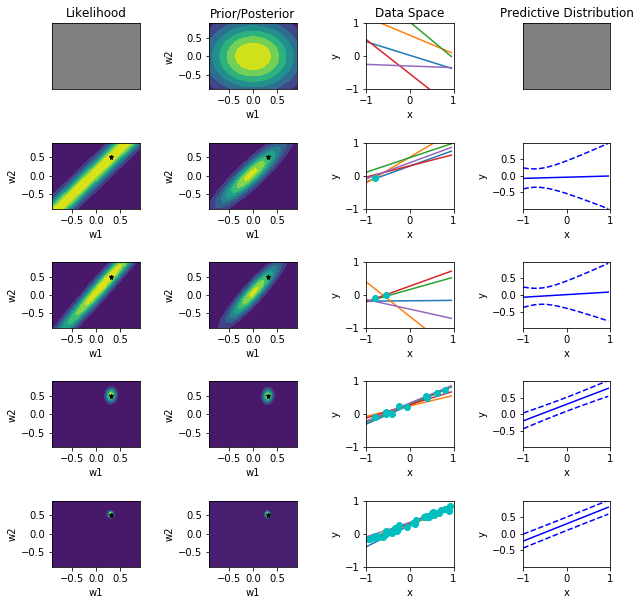

In [5]:
make_plot_given_sigma(sigmas[0])


#### Second covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{5}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

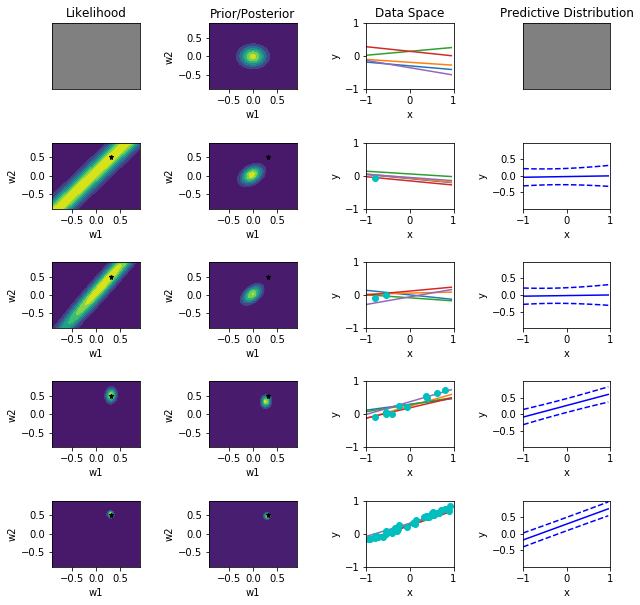

In [6]:
try:
    make_plot_given_sigma(sigmas[1])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

#### Third covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{10}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

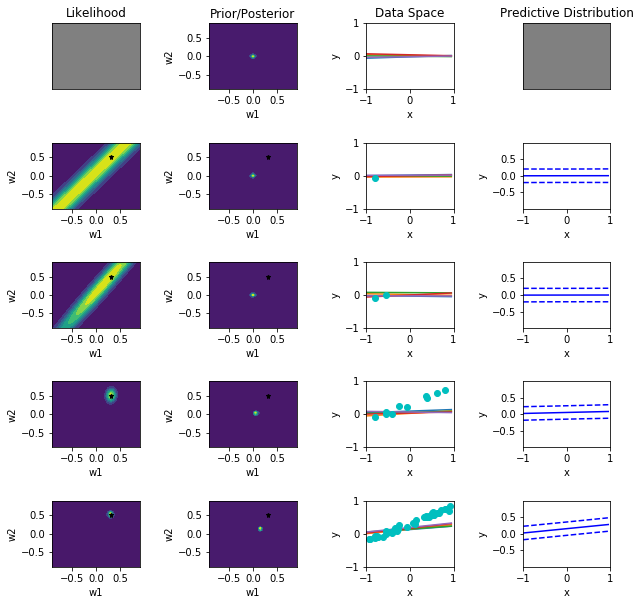

In [7]:
try:
    make_plot_given_sigma(sigmas[2])
except NameError:
    print('If not yet implemented, implement functions in problem.py.')
    print('If you have implemented, remove this try/except.')

## Instructions (continued):

### 5.5:

For questiion (5) (Comment on your results ...) no code is required -- instead please answer with a written description.

__Answer:__ <br>
(1)Sample size: For each covariance matrix, we have five rows of plots, from 1st row to fifth row, it shows the result as the number of the observed data points increases. The first row corresponds to the situation before any data points are observed so it shows the prior distribution in $w$. And from 2nd row to fifth, as sample size increases, (i)the likelihood bocomes more and more compact to the actual parameters, (ii)and the posterior distribution(which is represented by the light circle in the 2nd column) gets closer to actual parameters(represented by the dark circle in the 2nd column). (iii)And for the predictive distribution, the line becomes sharper, and closer to the actual linear regression model.<br>
(2)strength of the prior: We can compare plots with different covariance matrix, we can see as the variance of prior gets smaller, (i) the likelihood function remains the same as likelihood is not related to variance of $w$; (ii) the posterior distribution becomes more compact(for the same sample size), and when variance is really small(e.g.the third covaiance matrix), the posterior distribution may not reach the actual weight(it's because the prior distribution is of very small range(concentrated around mean), so it may dominates the posterior); (iii) the posterior predictive distribution becomes more and more compact, specifically the error bands get narrower and narrower as the variance in $w$ gets smaller(which is apparant when sample size is small), and when variance is really small, the predictive distribution cannot get close to the actual linear regression model.

## Instructions (continued):

### 5.6:

For question (6), find the MAP solution for the first prior covariance $\left(\frac{1}{2}I\right)$ by completing the implementation below. In addition, be sure to justify the value for the regularization coefficient (in `sklearn` named `alpha`) in your written work.

In [8]:
from sklearn.linear_model import Ridge

In [9]:
alpha = 0.08 # Change to the correct value
ridge = Ridge(alpha=alpha,
              fit_intercept=False,
              solver='cholesky')

ridge.fit(xtrain, ytrain)

Ridge(alpha=0.08, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

If alpha is set correctly, ridge.coef_ will equal the prior mean/MAP estimate returned by the next two cells.

In [10]:
ridge.coef_

array([[0.30052135, 0.52406189]])

In [11]:
prior = {"mean":np.matrix([[0], [0]]),
         "var":matlib.eye(2) * sigmas[0]}

post = get_posterior_params(xtrain, ytrain, prior,
                            likelihood_var = 0.2**2)
post[0].ravel()

matrix([[0.30052135, 0.52406189]])